In [46]:
api_key="B316U642L1RAQ051"

In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [4]:
alpha_vantage = TimeSeries(key=api_key, output_format='pandas')

In [5]:
# Retrieve intraday data from Alpha Vantage
daily_data, _ = alpha_vantage.get_daily(
    symbol='AAPL',
    outputsize='full'
)

In [6]:
daily_data.shape,daily_data.columns

((6017, 5),
 Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object'))

In [7]:
daily_data.head()

1. open  2. high   3. low  4. close   5. volume
date                                                       
2023-09-29   172.02   173.07  170.341    171.21  51861083.0
2023-09-28   169.34   172.03  167.620    170.69  56294419.0
2023-09-27   172.62   173.04  169.050    170.43  66921808.0
2023-09-26   174.82   175.20  171.660    171.96  64588945.0
2023-09-25   174.20   176.97  174.150    176.08  46172740.0

In [8]:
daily_data.rename(columns={"1. open":"open", "2. high":"high","3. low":"low", "4. close":"close","5. volume":"volume"},inplace=True)

In [9]:
daily_data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px

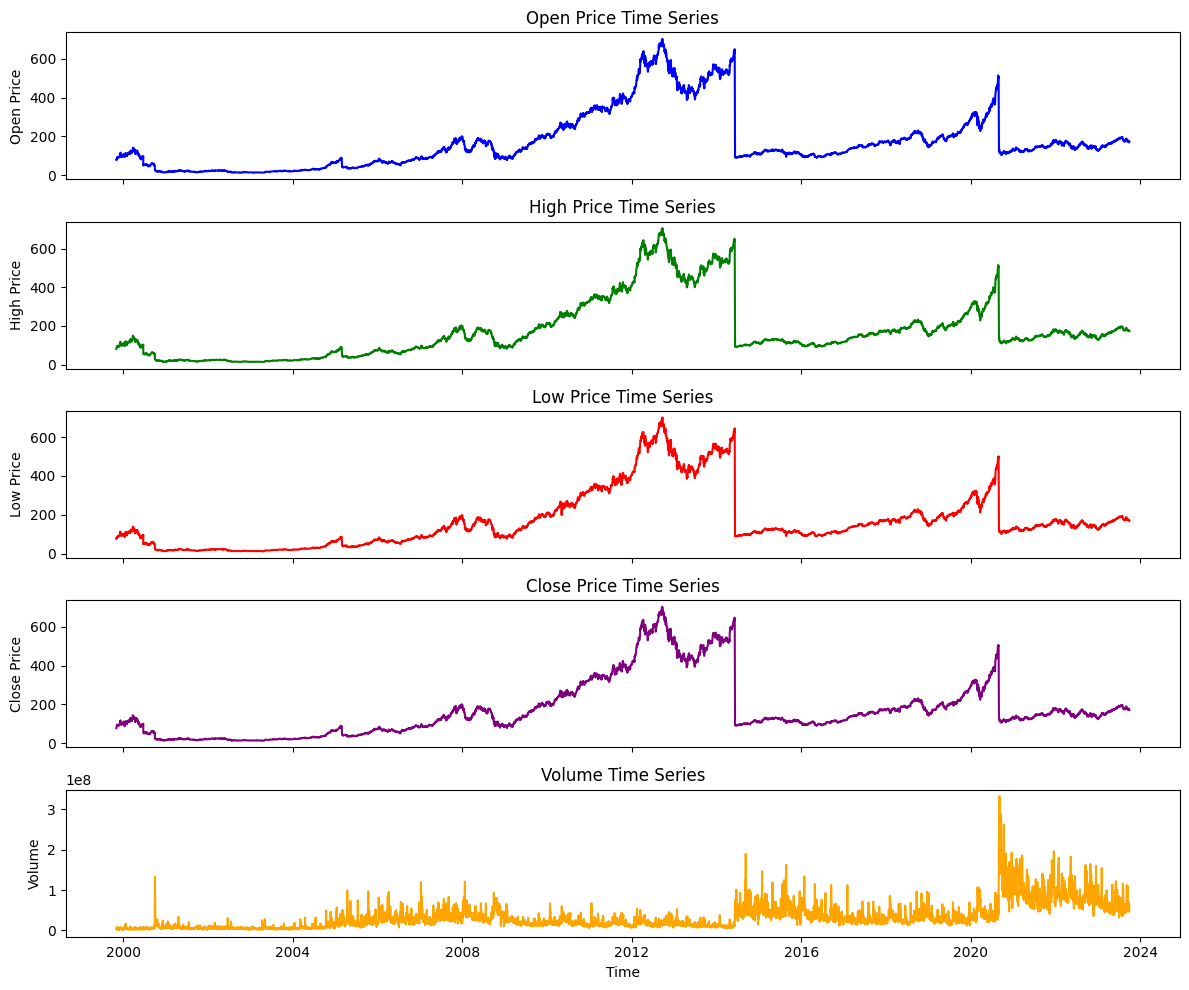

In [11]:
df=daily_data
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

# Plot 'open' column
axs[0].plot(df.index, df['open'], color='blue')
axs[0].set_ylabel('Open Price')
axs[0].set_title('Open Price Time Series')

# Plot 'high' column
axs[1].plot(df.index, df['high'], color='green')
axs[1].set_ylabel('High Price')
axs[1].set_title('High Price Time Series')

# Plot 'low' column
axs[2].plot(df.index, df['low'], color='red')
axs[2].set_ylabel('Low Price')
axs[2].set_title('Low Price Time Series')

# Plot 'close' column
axs[3].plot(df.index, df['close'], color='purple')
axs[3].set_ylabel('Close Price')
axs[3].set_title('Close Price Time Series')

# Plot 'volume' column
axs[4].plot(df.index, df['volume'], color='orange')
axs[4].set_ylabel('Volume')
axs[4].set_xlabel('Time')
axs[4].set_title('Volume Time Series')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
# Create an interactive line plot for 'open' column
fig_open = px.line(df, x=df.index, y='open', title='Open Price Time Series')
fig_open.update_xaxes(title_text='Date')
fig_open.update_yaxes(title_text='Open Price')

# Create an interactive line plot for 'high' column
fig_high = px.line(df, x=df.index, y='high', title='High Price Time Series')
fig_high.update_xaxes(title_text='Date')
fig_high.update_yaxes(title_text='High Price')

# Create an interactive line plot for 'low' column
fig_low = px.line(df, x=df.index, y='low', title='Low Price Time Series')
fig_low.update_xaxes(title_text='Date')
fig_low.update_yaxes(title_text='Low Price')

# Create an interactive line plot for 'close' column
fig_close = px.line(df, x=df.index, y='close', title='Close Price Time Series')
fig_close.update_xaxes(title_text='Date')
fig_close.update_yaxes(title_text='Close Price')

# Create an interactive line plot for 'volume' column
fig_volume = px.line(df, x=df.index, y='volume', title='Volume Time Series')
fig_volume.update_xaxes(title_text='Date')
fig_volume.update_yaxes(title_text='Volume')

# Show the interactive plots
fig_open.show()
fig_high.show()
fig_low.show()
fig_close.show()
fig_volume.show()

c:\Users\ASUS\OneDrive\Documents\Projects\StockArticleAnalysis\StockAnalysis\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
c:\Users\ASUS\OneDrive\Documents\Projects\StockArticleAnalysis\StockAnalysis\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\ASUS\OneDrive\Documents\Projects\StockArticleAnalysis\StockAnalysis\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.04)
fig.add_trace(go.Scatter(x=df.index, y=df['open'], mode='lines', name='Open Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['high'], mode='lines', name='High Price'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['low'], mode='lines', name='Low Price'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['volume'], mode='lines', name='volume'), row=4, col=1)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='Open', row=1, col=1)
fig.update_yaxes(title_text='High ', row=2, col=1)
fig.update_yaxes(title_text='Low ', row=3, col=1)
fig.update_yaxes(title_text='volume ', row=4, col=1)
fig.update_layout(title_text='Price Time Series', showlegend=True)
fig.show()


In [20]:
# daily_adj=alpha_vantage.get_daily_adjusted(symbol='AAPL',outputsize='full')
# daily_adj.shape,daily_adj.head()

In [26]:
df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
DailyReturns    0
50_Day_SMA      0
200_Day_SMA     0
dtype: int64

In [23]:
df['DailyReturns'] = df['close'].pct_change()
df['50_Day_SMA'] = df['close'].rolling(min_periods=1,window=50).mean()
df['200_Day_SMA'] = df['close'].rolling(min_periods=1,window=200).mean()
df.head()

open    high      low   close      volume  DailyReturns  \
date                                                                    
2023-09-29  172.02  173.07  170.341  171.21  51861083.0           NaN   
2023-09-28  169.34  172.03  167.620  170.69  56294419.0     -0.003037   
2023-09-27  172.62  173.04  169.050  170.43  66921808.0     -0.001523   
2023-09-26  174.82  175.20  171.660  171.96  64588945.0      0.008977   
2023-09-25  174.20  176.97  174.150  176.08  46172740.0      0.023959   

            50_Day_SMA  200_Day_SMA  
date                                 
2023-09-29  171.210000   171.210000  
2023-09-28  170.950000   170.950000  
2023-09-27  170.776667   170.776667  
2023-09-26  171.072500   171.072500  
2023-09-25  172.074000   172.074000

In [25]:
df['DailyReturns'].bfill(inplace=True)

In [29]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.04)
fig.add_trace(go.Scatter(x=df.index, y=df['DailyReturns'], mode='lines', name='Daily Returns'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['50_Day_SMA'], mode='lines', name='50-MA'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['200_Day_SMA'], mode='lines', name='200-MA'), row=3, col=1)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='D.R.', row=1, col=1)
fig.update_yaxes(title_text='50MA ', row=2, col=1)
fig.update_yaxes(title_text='200MA ', row=3, col=1)
fig.update_layout(title_text='Price Time Series', showlegend=True)
fig.show()

In [87]:
import requests

def get_news_sentiment(api_key, tickers=None, topics=None, time_from=None, time_to=None, sort=None, limit=None):
    base_url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT'
    params = {'apikey': api_key}
    if tickers:
         params['tickers'] = tickers
    # if topics:
    #     params['topics'] = ','.join(topics)
    if time_from:
        params['time_from'] = time_from
    if time_to:
        params['time_to'] = time_to
    if sort:
        params['sort'] = sort
    if limit:
        params['limit'] = limit
    print(params)

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        json_data = response.json()
        # print(json_data)
        data = []
        for item in json_data.get('feed', []):
            time_published = item.get('time_published')
            # print(time_published)
            title = item.get('title')
            summary=item.get('summary')
            data.append([time_published, title,summary])
        df = pd.DataFrame(data, columns=['date', 'headline','summary'])
        df.to_csv('news_sentiment_data.csv', index=False)
        print("CSV data saved to 'news_sentiment_data.csv'")
        return df
    else:
        return None

tickers = 'AAPL'
# topics = 'technology', 'earnings','financial_markets','finance','ipo','economy_fiscal','economy_monetary'
time_from = '20000101T0000'
sort = 'LATEST'
limit = 1000


In [88]:
news_sentiment_data = get_news_sentiment(api_key=api_key, tickers=tickers, time_from=time_from, sort=sort, limit=limit)
news_sentiment_data.shape

{'apikey': 'B316U642L1RAQ051', 'tickers': 'AAPL', 'time_from': '20000101T0000', 'sort': 'LATEST', 'limit': 1000}


CSV data saved to 'news_sentiment_data.csv'


(688, 3)

In [89]:
import pandas as pd

# Assuming you have a DataFrame named 'news_sentiment_data'
news_sentiment_data['date'] = pd.to_datetime(news_sentiment_data['date'], format='%Y%m%dT%H%M%S')
news_sentiment_data.head()


date                                           headline  \
0 2023-10-02 18:50:00  Apple iPhone 15 Pro Lead Times Shorten As Supp...   
1 2023-10-02 18:12:28  What to Watch for This Week as Markets Continu...   
2 2023-10-02 17:01:20  Apple Could Be Revving Up Formula One Global R...   
3 2023-10-02 16:36:46  Players Upset As Velve's 'Counter-Strike 2' Dr...   
4 2023-10-02 16:11:00  Microsoft's Satya Nadella Speaks: AI Could Bol...   

                                             summary  
0  Apple Stock Rises On iPhone 15 Sales Updates I...  
1  Early on in my career as a trader, I learned s...  
2  Once a staple for traditional media companies,...  
3  "Counter-Strike 2" was released as an update t...  
4  Microsoft Corp's MSFT CEO, Satya Nadella, rece...

In [90]:
news_sentiment_data['date']=news_sentiment_data['date'].dt.date

In [91]:
unique_dates = news_sentiment_data['date'].unique()
print(len(unique_dates))

24


In [92]:
news_sentiment_data.head()

date                                           headline  \
0  2023-10-02  Apple iPhone 15 Pro Lead Times Shorten As Supp...   
1  2023-10-02  What to Watch for This Week as Markets Continu...   
2  2023-10-02  Apple Could Be Revving Up Formula One Global R...   
3  2023-10-02  Players Upset As Velve's 'Counter-Strike 2' Dr...   
4  2023-10-02  Microsoft's Satya Nadella Speaks: AI Could Bol...   

                                             summary  
0  Apple Stock Rises On iPhone 15 Sales Updates I...  
1  Early on in my career as a trader, I learned s...  
2  Once a staple for traditional media companies,...  
3  "Counter-Strike 2" was released as an update t...  
4  Microsoft Corp's MSFT CEO, Satya Nadella, rece...

In [93]:
df.head()

open    high      low   close      volume  DailyReturns  \
date                                                                    
2023-09-29  172.02  173.07  170.341  171.21  51861083.0     -0.003037   
2023-09-28  169.34  172.03  167.620  170.69  56294419.0     -0.003037   
2023-09-27  172.62  173.04  169.050  170.43  66921808.0     -0.001523   
2023-09-26  174.82  175.20  171.660  171.96  64588945.0      0.008977   
2023-09-25  174.20  176.97  174.150  176.08  46172740.0      0.023959   

            50_Day_SMA  200_Day_SMA  
date                                 
2023-09-29  171.210000   171.210000  
2023-09-28  170.950000   170.950000  
2023-09-27  170.776667   170.776667  
2023-09-26  171.072500   171.072500  
2023-09-25  172.074000   172.074000

In [94]:
import pandas as pd
from textblob import TextBlob  # You'll need to install the textblob library

def process_news_data(news_sentiment_data):
    news_sentiment_data['news'] = news_sentiment_data['headline'] + ' ' + news_sentiment_data['summary']
    return news_sentiment_data

def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

processed_data = process_news_data(news_sentiment_data)
processed_data.head()



date                                           headline  \
0  2023-10-02  Apple iPhone 15 Pro Lead Times Shorten As Supp...   
1  2023-10-02  What to Watch for This Week as Markets Continu...   
2  2023-10-02  Apple Could Be Revving Up Formula One Global R...   
3  2023-10-02  Players Upset As Velve's 'Counter-Strike 2' Dr...   
4  2023-10-02  Microsoft's Satya Nadella Speaks: AI Could Bol...   

                                             summary  \
0  Apple Stock Rises On iPhone 15 Sales Updates I...   
1  Early on in my career as a trader, I learned s...   
2  Once a staple for traditional media companies,...   
3  "Counter-Strike 2" was released as an update t...   
4  Microsoft Corp's MSFT CEO, Satya Nadella, rece...   

                                                news  
0  Apple iPhone 15 Pro Lead Times Shorten As Supp...  
1  What to Watch for This Week as Markets Continu...  
2  Apple Could Be Revving Up Formula One Global R...  
3  Players Upset As Velve's 'Counter-Strike 2' Dr...  
4  Microsoft's Satya Nadella Speaks: AI Could Bol...

In [95]:
news_sentiment_data['sentiment_score'] = news_sentiment_data['news'].apply(calculate_sentiment)
news_sentiment_data.drop(['news','summary'], axis=1, inplace=True)
news_sentiment_data.head()

date                                           headline  \
0  2023-10-02  Apple iPhone 15 Pro Lead Times Shorten As Supp...   
1  2023-10-02  What to Watch for This Week as Markets Continu...   
2  2023-10-02  Apple Could Be Revving Up Formula One Global R...   
3  2023-10-02  Players Upset As Velve's 'Counter-Strike 2' Dr...   
4  2023-10-02  Microsoft's Satya Nadella Speaks: AI Could Bol...   

   sentiment_score  
0         0.000000  
1         0.013095  
2         0.098148  
3         0.120170  
4        -0.066667

In [96]:
news_sentiment_data.to_csv('news_sent.csv',index=False)

In [97]:

news_sentiment_data = news_sentiment_data.groupby('date')['sentiment_score'].mean().reset_index()
news_sentiment_data.head()


date  sentiment_score
0  2023-09-09         0.270023
1  2023-09-10         0.129888
2  2023-09-11         0.078740
3  2023-09-12         0.102585
4  2023-09-13         0.093812

In [106]:
news_sentiment_data=news_sentiment_data.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [101]:
news_sentiment_data.shape

(24, 1)

In [107]:
news_sentiment_data.index=pd.to_datetime(news_sentiment_data.index)

In [108]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.04)
fig.add_trace(go.Scatter(x=news_sentiment_data.index, y=news_sentiment_data['sentiment_score'], mode='lines', name='Sentiment score'), row=1, col=1)
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_yaxes(title_text='S. Score.', row=1, col=1)
fig.update_layout(title_text='Price Time Series', showlegend=True)
fig.show()

In [109]:
df.index

DatetimeIndex(['2023-09-29', '2023-09-28', '2023-09-27', '2023-09-26',
               '2023-09-25', '2023-09-22', '2023-09-21', '2023-09-20',
               '2023-09-19', '2023-09-18',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', name='date', length=6017, freq=None)

In [110]:
news_sentiment_data.index

DatetimeIndex(['2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
               '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02'],
              dtype='datetime64[ns]', name='date', freq=None)

In [112]:
# Merge based on the 'date' column with an outer join
merged_data = df.merge(news_sentiment_data, left_on='date', right_on='date', how='outer')

merged_data[['sentiment_score']] = merged_data[['sentiment_score']].ffill()

In [113]:
merged_data.shape,merged_data.isna().sum()

((6026, 9),
 open               9
 high               9
 low                9
 close              9
 volume             9
 DailyReturns       9
 50_Day_SMA         9
 200_Day_SMA        9
 sentiment_score    0
 dtype: int64)

In [115]:
merged_data.dropna(inplace=True)
merged_data.shape,merged_data.isna().sum()

((6017, 9),
 open               0
 high               0
 low                0
 close              0
 volume             0
 DailyReturns       0
 50_Day_SMA         0
 200_Day_SMA        0
 sentiment_score    0
 dtype: int64)

In [118]:
merged_data.head()

open   high    low  close     volume  DailyReturns  50_Day_SMA  \
date                                                                          
1999-11-01  80.00  80.69  77.37  77.62  2487300.0     -0.032773     97.3678   
1999-11-02  78.00  81.69  77.31  80.25  3564600.0     -0.015337     97.5592   
1999-11-03  81.62  83.25  81.00  81.50  2932700.0     -0.025353     97.8892   
1999-11-04  82.06  85.37  80.62  83.62  3384700.0     -0.053108     98.2680   
1999-11-05  84.62  88.37  84.00  88.31  3721500.0     -0.083636     98.6744   

            200_Day_SMA  sentiment_score  
date                                      
1999-11-01     96.55540          0.07874  
1999-11-02     96.40980          0.07874  
1999-11-03     96.26575          0.07874  
1999-11-04     96.10825          0.07874  
1999-11-05     95.94265          0.07874

In [117]:
merged_data=merged_data.sort_index()

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [123]:

# Select the columns you want to use as features
features = ['open', 'high', 'low', 'close','DailyReturns', 'volume', '50_Day_SMA', '200_Day_SMA', 'sentiment_score']
data = merged_data[features]

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=features)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        X = data.iloc[i:i+sequence_length]
        y = data.iloc[i+sequence_length]['close']  # Close price is the target variable
        sequences.append(X)
        labels.append(y)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [124]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [166]:
# Store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [130]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((1194, 10, 9), (1194,), (4803, 10, 9), (4803,))

In [167]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)


38/38 [==============================] - 0s 8ms/step


In [134]:
y_pred.shape,y_pred[0],y_test[0]

((1194, 1), array([0.18771091], dtype=float32), 0.1873349008679497)

In [139]:

# # Create a copy of the test data and set the 'close' column to the predicted values
# test_data_copy = test_data.copy()
# test_data_copy['close'] = y_pred

# # Inverse transform only the 'close' column
# y_pred = scaler.inverse_transform(test_data_copy[['close']])
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Mean Squared Error: 1.680582141195743e-05


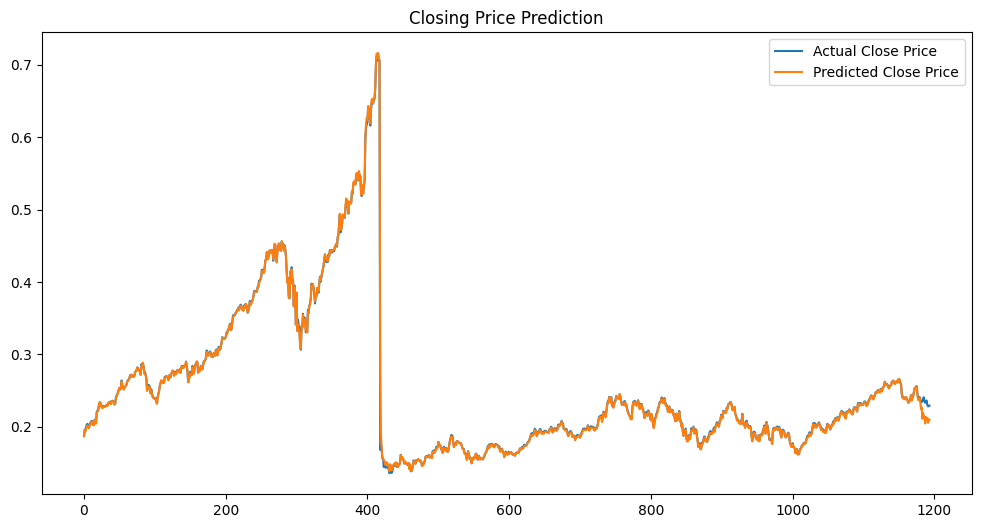

In [168]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.legend()
plt.title('Closing Price Prediction')
plt.show()

In [135]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12051 (47.07 KB)
Trainable params: 12051 (47.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


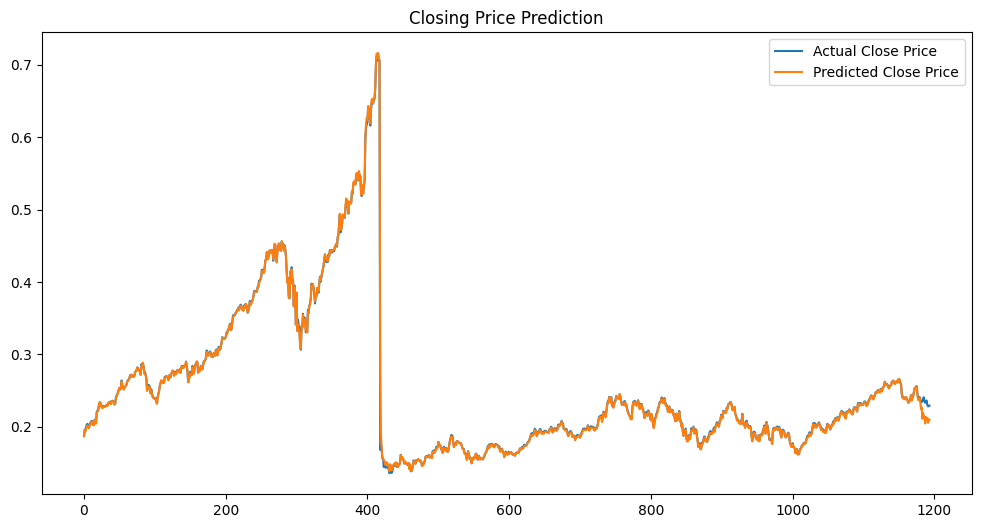

In [169]:

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.legend()
plt.title('Closing Price Prediction')
plt.show()

# Extract training and validation losses
training_loss = history.history['loss']
# validation_loss = history.history['val_loss']

# Plot the training and validation losses using Plotly
loss_trace = go.Scatter(x=history.epoch, y=training_loss, mode='lines', name='Training Loss')
# val_loss_trace = go.Scatter(x=history.epoch, y=validation_loss, mode='lines', name='Validation Loss')
layout = go.Layout(title='Training and Validation Loss Over Epochs', xaxis=dict(title='Epochs'), yaxis=dict(title='Loss'))
fig = go.Figure(data=[loss_trace], layout=layout)
fig.show()

In [171]:
import tensorflow.keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mape(y_true, y_pred):
    return 100 * K.mean(K.abs((y_true - y_pred) / y_true))
rmse=rmse(y_test,y_pred)
mape=mape(y_test,y_pred)
print("RMSE: ",rmse)
print("MAPE: ",mape)

RMSE:  tf.Tensor(0.1461576408009114, shape=(), dtype=float64)
MAPE:  tf.Tensor(40.01746821676952, shape=(), dtype=float64)


In [160]:
import numpy as np

# Define a function to forecast future close prices
def forecast_future_close_prices(model, latest_data, sequence_length, num_future_days):
    forecasted_prices = []

    # Initialize the input sequence with the latest available data
    input_sequence = latest_data[-sequence_length:].reshape(1, sequence_length, -1)

    for _ in range(num_future_days):
        # Predict the next day's closing price
        predicted_price = model.predict(input_sequence)[0][0]
        print(predicted_price)
        forecasted_prices.append(predicted_price)

        # Update the input sequence for the next prediction
        input_sequence = np.append(input_sequence[0][1:], predicted_price).reshape(1, sequence_length, -1)

    return forecasted_prices

# Example usage:
# Assuming you have the latest available data in 'latest_data' and 'sequence_length' defined
future_close_prices = forecast_future_close_prices(model, np.array(test_data), sequence_length, num_future_days=10)
print("Forecasted Close Prices for the Next 10 Days:")
print(future_close_prices)


1/1 [==============================] - 0s 78ms/step
0.20442142


ValueError: cannot reshape array of size 82 into shape (1,10,newaxis)

In [ ]:
# Plot the stock trends
plot_stock_trend_lstm(train_data, test_data, predictions)

In [142]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
